In [3]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [2]:
type(model)

gensim.models.keyedvectors.Word2VecKeyedVectors

TypeError: most_similar_to_given() got an unexpected keyword argument 'topn'

In [6]:

print(model.similar_by_word("King", topn = 5))
print(model.similar_by_word("London", topn = 5))
print(model.similar_by_word("Good", topn = 5))
print(model.similar_by_word("Apple", topn = 5))


result = model.distances("Apple")
indices = result.argsort()[0:6]
for idx in indices:
    print(model.index2entity[idx])
    print(model.distance("Apple", model.index2entity[idx]))
    print(model.similarity("Apple", model.index2entity[idx]))


[('Jackson', 0.5326348543167114), ('Prince', 0.5306329727172852), ('Tupou_V.', 0.5292825698852539), ('KIng', 0.5227501392364502), ('e_mail_robert.king_@', 0.5173623561859131)]
[('EURASIAN_NATURAL_RESOURCES_CORP.', 0.6739696860313416), ('Londons', 0.6536128520965576), ('Islamabad_Slyvia_Hui', 0.6375559568405151), ('Wandsworth', 0.6133824586868286), ('Canary_Wharf', 0.6119279861450195)]
[('Bad', 0.6172203421592712), ('good', 0.5586156249046326), ('Decent', 0.5168190002441406), ('Better', 0.5037919878959656), ('LAKE_WYLIE_Largemouth_Bass', 0.500469982624054)]
[('Apple_AAPL', 0.7456985712051392), ('Apple_Nasdaq_AAPL', 0.7300410270690918), ('Apple_NASDAQ_AAPL', 0.7175089716911316), ('Apple_Computer', 0.7145973443984985), ('iPhone', 0.6924266219139099)]
Apple
0.0
1.0
Apple_AAPL
0.25430142879486084
0.7456986
Apple_Nasdaq_AAPL
0.2699589133262634
0.7300411
Apple_NASDAQ_AAPL
0.2824910879135132
0.7175089
Apple_Computer
0.28540271520614624
0.7145973
iPhone
0.3075733780860901
0.6924266


In [3]:
print(model.distance("King", "Prince"))
print(model.similarity("King", "King"))

0.46936702728271484
1.0


In [48]:
f = open("seqs.txt", "r")
count = 0
result = 0
for x in f:
    words = x.split()
    val = model.get_vector(words[2]) + model.get_vector(words[1]) - model.get_vector(words[0])
    answer = words[3]
    guess = model.similar_by_vector(val, topn = 1)[0][0]
    if answer == guess:
        result = result + 1
    count = count + 1
    if (count % 100 == 0):
        print(result)
        print(count)
print(result)
print(count)
    
  


26
100
62
200
104
300
136
400
176
500
222
600
241
700
263
800
283
900
302
1000
331
1100
350
1200
362
1300
383
1400
410
1500
442
1600
473
1700
515
1800
523
1900
540
2000
557
2100
576
2200
607
2300
631
2400
655
2500
671
2600
677
2700
691
2800
718
2900
731
3000
748
3100
764
3200
778
3300
791
3400
801
3500
807
3600
821
3700
839
3800
858
3900
875
4000
880
4100
899
4200
914
4300
937
4400
967
4500
994
4600
1014
4700
1023
4800
1056
4900
1090
5000
1108
5100
1108
5200
1116
5300
1122
5400
1129
5500
1135
5600
1151
5700
1156
5800
1171
5900
1197
6000
1209
6100
1224
6200
1241
6300
1243
6400
1252
6500
1267
6600
1271
6700
1283
6800
1289
6900
1293
7000
1299
7100
1306
7200
1313
7300
1320
7400
1325
7500
1330
7600
1331
7700
1332
7800
1333
7900
1339
8000
1341
8100
1344
8200
1354
8300
1376
8400
1431
8500
1464
8600
1493
8700
1523
8800
1539
8869


In [49]:
f = open("synt.txt", "r")
count = 0
result = 0
for x in f:
    words = x.split()
    val = model.get_vector(words[2]) + model.get_vector(words[1]) - model.get_vector(words[0])
    answer = words[3]
    guess = model.similar_by_vector(val, topn = 1)[0][0]
    if answer == guess:
        result = result + 1
    count = count + 1
    if (count % 100 == 0):
        print(result)
        print(count)
print(result)
print(count)
    

0
100
2
200
2
300
3
400
3
500
6
600
9
700
10
800
15
900
17
1000
17
1100
17
1200
23
1300
23
1400
24
1500
27
1600
30
1700
32
1800
68
1900
124
2000
162
2100
195
2200
233
2300
270
2400
305
2500
333
2600
381
2700
413
2800
470
2900
510
3000
531
3100
550
3200
570
3300
586
3400
600
3500
615
3600
636
3700
657
3800
679
3900
716
4000
739
4100
764
4200
767
4300
769
4400
778
4500
783
4600
797
4700
806
4800
810
4900
811
5000
819
5100
822
5200
829
5300
907
5400
963
5500
1039
5600
1112
5700
1195
5800
1257
5900
1341
6000
1420
6100
1478
6200
1559
6300
1621
6400
1699
6500
1782
6600
1868
6700
1952
6800
2031
6900
2054
7000
2064
7100
2078
7200
2088
7300
2090
7400
2105
7500
2115
7600
2118
7700
2126
7800
2133
7900
2146
8000
2161
8100
2168
8200
2181
8300
2190
8400
2203
8500
2210
8600
2219
8700
2221
8800
2227
8900
2229
9000
2235
9100
2240
9200
2242
9300
2246
9400
2254
9500
2255
9600
2261
9700
2270
9800
2299
9900
2311
10000
2323
10100
2335
10200
2342
10300
2366
10400
2391
10500
2401
10600
2406
10675


In [8]:
model.syn0.shape

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  """Entry point for launching an IPython kernel.


(3000000, 300)

In [6]:
import numpy as np
X  =  np.random.permutation(model.syn0)[:10000]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  


In [7]:
U, S, Vh = np.linalg.svd(X)

Text(0, 0.5, 'Principal Component 2')

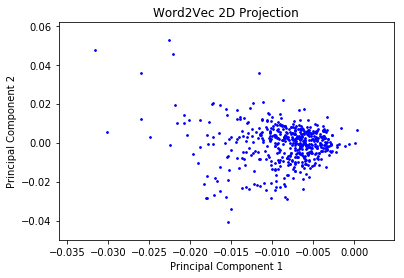

In [15]:
import matplotlib.pyplot as plt
U = U[:, :-2]
Y_0 = U.T 
plt.scatter(Y_0[0][0:500], Y_0[1][0:500], c='blue', s = 3)
plt.title("Word2Vec 2D Projection")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
